# Problem Statement

In this project we will build a model to predict the electrical energy output of a 
Combined Cycle Power Plant
, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.

The columns in the data consist of hourly average ambient variables:
- Temperature (T) in the range 1.81°C to 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

The 
dataset 
may be downloaded as a csv file.  Note that Safari users may have to navigate to File -> Save As and select the option "Save as source" to download the file.  Once you have downloaded the data, please review the Project Modeling Options reading and select a method of working with the data to build your model: 1) using Excel, 2) using Python, or 3) using Google AutoML.

Data source:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

Guidelines for the project:
To complete the project, you must complete each of the below steps in the modeling process.  

For the problem described in the Project Topic section above, determine what type of machine learning approach is needed and select an appropriate output metric to evaluate performance in accomplishing the task.

Determine which possible features we may want to use in the model, and identify the different algorithms we might consider.

Split your data to create a test set to evaluate the performance of your final model.  Then, using your training set, determine a validation strategy for comparing different models - a fixed validation set or cross-validation.  Depending on whether you are using Excel, Python or AutoML for your model building, you may need to manually split your data to create the test set and validation set / cross validation folds.

Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.

Evaluate the performance of your final model using the output metric you defined earlier.  

Once you have completed all steps, create and record a brief (5 minutes maximum) presentation video describing your approach to each step.  Your video must include a quick demo or screenshot of the final model you have created.  In your video, be sure to clearly address the 4 elements on which your presentation will be evaluated.

## Linear regression models could be a reasonable starting point to explore for this problem due to the following reasons:

- Linear Relationship: Linear regression models assume a linear relationship between the independent variables (Temperature, Ambient Pressure, Relative Humidity, and Exhaust Vacuum) and the dependent variable (Net hourly electrical energy output). While the relationship may not be perfectly linear, linear regression models can often capture the general trend and provide a baseline for comparison with more complex models.
- Interpretability: Linear regression models are relatively simple and easy to interpret. The coefficients of the independent variables in the regression equation can provide insights into the relative importance and impact of each variable on the target variable. This interpretability can be valuable for understanding the underlying relationships and making decisions based on the model.
- Baseline Model: Even if linear regression models do not provide the best performance, they can serve as a baseline for comparing the performance of more complex models. If a complex model does not significantly outperform a simple linear regression model, it may not be worth the additional complexity and computational cost.
- Feature Selection: Linear regression models can be used as a tool for feature selection. By analyzing the coefficients and statistical significance of the independent variables, less important or redundant features can be identified and potentially removed, simplifying the model and improving its performance.

## To determine the best linear regression approach i commonly use pycaret framework to create experiments that evaluate and test 

# In case anyone wants to set this up for themselves

In [1]:
#conda create -n pycaret python=3.10 pycaret notebook ipykernel

In [2]:
#!pip install "pycaret[analysis]"
#!pip install "pycaret[models]"
#!pip install "pycaret[tuner]"
#!pip install "pycaret[mlops]"
#!pip install "pycaret[parallel]"
#!pip install "pycaret[test]"
#!pip install scikit-learn
#!pip install gradio

In [3]:
# check installed version (must be >3.0)
import pycaret
import pandas as pd
pycaret.__version__

'3.3.0'

In [4]:
### load  dataset 
data = pd.read_csv('CCPP_data.csv')

## Regression
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'PE')

,Description,Value
0,Session id,8259
1,Target,PE
2,Target type,Regression
3,Original data shape,"(9568, 5)"
4,Transformed data shape,"(9568, 5)"
5,Transformed train set shape,"(6697, 5)"
6,Transformed test set shape,"(2871, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [6]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [7]:
# init setup on exp
exp.setup(data, target = 'PE', session_id = 123)

,Description,Value
0,Session id,123
1,Target,PE
2,Target type,Regression
3,Original data shape,"(9568, 5)"
4,Transformed data shape,"(9568, 5)"
5,Transformed train set shape,"(6697, 5)"
6,Transformed test set shape,"(2871, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [8]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2.3311,11.0402,3.3081,0.9622,0.0073,0.0051,0.0120
catboost,CatBoost Regressor,2.4044,11.2093,3.3344,0.9616,0.0073,0.0053,0.2270
lightgbm,Light Gradient Boosting Machine,2.5290,12.0600,3.4605,0.9587,0.0076,0.0056,0.5890
et,Extra Trees Regressor,2.4592,12.2134,3.4824,0.9582,0.0076,0.0054,0.0660
rf,Random Forest Regressor,2.4770,12.2482,3.4871,0.9581,0.0076,0.0055,0.1460
gbr,Gradient Boosting Regressor,2.9801,15.4477,3.9201,0.9471,0.0086,0.0066,0.0570
knn,K Neighbors Regressor,3.0119,17.0815,4.1233,0.9415,0.0090,0.0066,0.0040
ridge,Ridge Regression,3.6311,21.0833,4.5869,0.9278,0.0101,0.0080,0.0030
lr,Linear Regression,3.6311,21.0834,4.5869,0.9278,0.0101,0.0080,0.2040
br,Bayesian Ridge,3.6312,21.0834,4.5869,0.9278,0.0101,0.0080,0.0040


## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

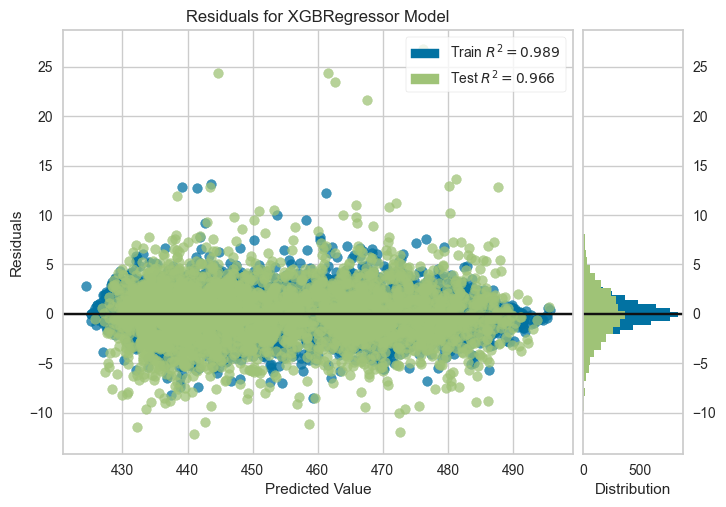

In [9]:
# plot residuals
plot_model(best, plot = 'residuals')

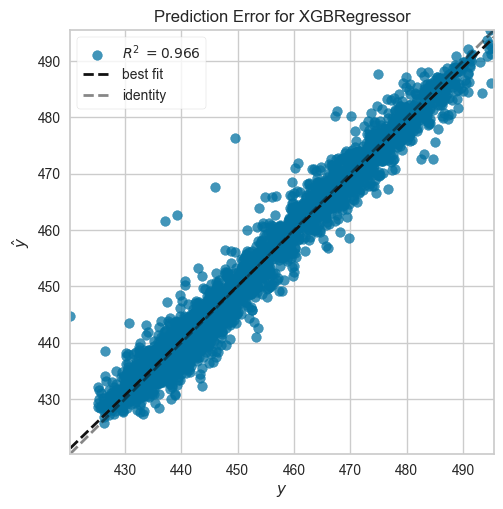

In [10]:
# plot error
plot_model(best, plot = 'error')

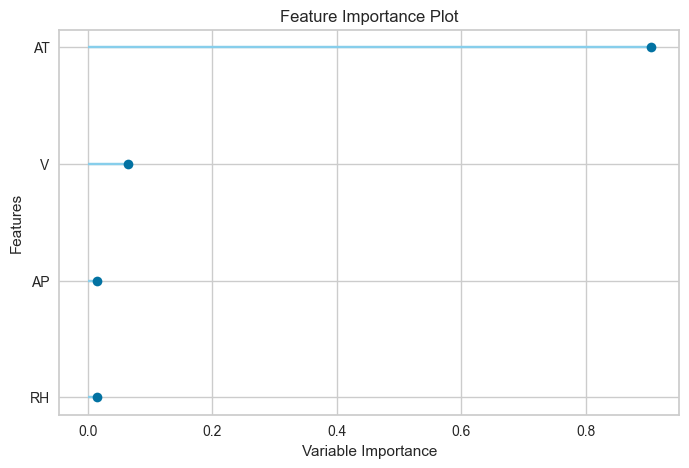

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [12]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [13]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2.2795,9.7414,3.1211,0.9663,0.0069,0.0050


In [14]:
# show predictions df
holdout_pred.head()

,AT,V,AP,RH,PE,prediction_label
4676,24.67,49.500000,1013.619995,59.419998,455.309998,450.704376
9418,12.36,40.560001,1022.109985,72.989998,474.709991,476.606537
9164,12.31,37.730000,1023.299988,63.009998,472.079987,471.701599
3719,22.10,71.290001,1008.200012,75.379997,442.350006,441.900269
3965,10.08,43.139999,1010.669983,85.900002,478.730011,474.957184


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `PE`. We can then use the new data frame without labels for scoring.

In [15]:
# copy data and drop PE which is our target

new_data = data.copy()
new_data.drop('PE', axis=1, inplace=True)
new_data.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [16]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,AT,V,AP,RH,prediction_label
0,14.960000,41.759998,1024.069946,73.169998,463.083740
1,25.180000,62.959999,1020.039978,59.080002,444.234344
2,5.110000,39.400002,1012.159973,92.139999,487.177277
3,20.860001,57.320000,1010.239990,76.639999,449.003906
4,10.820000,37.500000,1009.229980,96.620003,473.481384


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [17]:
# save pipeline
save_model(best, 'power_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['AT', 'V', 'AP', 'RH'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
    

In [18]:
# load pipeline
loaded_best_pipeline = load_model('power_regression_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/ys/ks2qp01x4xdgdkrb5xtx2lzr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['AT', 'V', 'AP', 'RH'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 XGBRegressor(base_score=Non...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=8259, ...))])

# Now lets use the model with a simple interface

### Note: 
The Gradio interface also provides an API so it can be integrated into larger projects, Click the API button at the bottom of the window

In [19]:
import gradio as gr
import numpy as np
import pickle

In [20]:
# Predict function
def predict(AT, V, AP, RH):
    features = np.array([AT, V, AP, RH]).reshape(1, -1)
    # Create a DataFrame with column names
    feature_names = ["AT", "V", "AP", "RH"]
    df = pd.DataFrame(features, columns=feature_names)
    #run the prediction
    prediction = predict_model(best,df)
    # Get just the prediction and round it
    response = round(prediction.loc[0, "prediction_label"],2)
    return response


In [21]:
with gr.Blocks() as demo:
    # Note: slider ranges were determined by researching reasonable min/max values.
    with gr.Row():
        AT = gr.Slider(-50, 50, value=20, step=.5, label="Air Temperature (°C)")
        V = gr.Slider(0, 150, value=50, step=1, label="Wind Speed (km/h)")
    with gr.Row():
        AP = gr.Slider(700, 1200, value=1000, step=10, label="Air Pressure (hPa)")
        RH = gr.Slider(10, 100, value=50, step=.5, label="Relative Humidity (%)")

    output = gr.Textbox(label="Prediction in MegaWatts", value="", show_label=True)
    predict_btn = gr.Button("Predict")

    predict_btn.click(fn=predict, inputs=[AT, V, AP, RH], outputs=output)

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
